The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Objective of project

Prediction of two values:
1. primary_fuel
2. capacity_mw

# Methodology
1. analyse the data
2. Clean the data
3. Perform Visualization,feature engineering, feature selection and Classification modelling on Primary fuel
4. Perform Visualization,feature engineering, feature selection and  regression modelling on capacity_mw

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#SCORE CHECKERS-Classifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score


#Model building libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#EDA libraries
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV
#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# Data Description

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [81]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

The database has 25 columns

Both categorical and numerical data are present

**Meaning of the columns**

1. `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 
2. `country_long` (text): longer form of the country designation
3. `name` (text): name or title of the power plant, generally in Romanized form
4. `gppd_idnr` (text): 10 or 12 character identifier for the power plant
5.  `capacity_mw` (number): electrical generating capacity in megawatts
6. `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. `primary_fuel` (text): energy source used in primary electricity generation or export
9. `other_fuel1` (text): energy source used in electricity generation or export
10. `other_fuel2` (text): energy source used in electricity generation or export
11. `other_fuel3` (text): energy source used in electricity generation or export
12. `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. `owner` (text): majority shareholder of the power plant, generally in Romanized form
14. `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. `url` (text): web document corresponding to the `source` field
16. `geolocation_source` (text): attribution for geolocation information
17. `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. `year_of_capacity_data` (number): year the capacity information was reported
19. `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. `generation_data_source` (text): attribution for the reported generation information
27. `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
29. `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
30. `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
31. `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
32. 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
33. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
34. `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
35. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
36. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

# Statistical data analysis

In [82]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,Shiloj Solar Power Plant,IND0000226,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


**Observations**

1.Number of rows/data present is 908

2.Large number of null values present

3.Only one unique value present in country,country_long,other_fuel2,generation_data_source, so will drop the columns

# FEATURE ENGINEERING

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

**1.renaming columns**

In [84]:
df.rename(columns = {'country':'country_code'}, inplace = True)
df.rename(columns = {'country_long':'longerform_country'}, inplace = True)
df.rename(columns = {'name':'name_of_powerplant'}, inplace = True)
df.rename(columns = {'gppd_idnr':'characteridentifier_of_power plant'}, inplace = True)
df.rename(columns = {'capacity_mw':'electrical_generation_Megawatts'}, inplace = True)
df.rename(columns = {'wepp_id':'unique plant identifier'}, inplace = True)
df.rename(columns = {'generation_gwh_2013':'electricity generation_gigawatt_2013'}, inplace = True)
df.rename(columns = {'generation_gwh_2014':'electricity generation_gigawatt_2014'}, inplace = True)
df.rename(columns = {'generation_gwh_2015':'electricity generation_gigawatt_2015'}, inplace = True)
df.rename(columns = {'generation_gwh_2016':'electricity generation_gigawatt_2016'}, inplace = True)
df.rename(columns = {'generation_gwh_2017':'electricity generation_gigawatt_2017'}, inplace = True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country_code                          908 non-null    object 
 1   longerform_country                    908 non-null    object 
 2   name_of_powerplant                    908 non-null    object 
 3   characteridentifier_of_power plant    908 non-null    object 
 4   electrical_generation_Megawatts       908 non-null    float64
 5   latitude                              862 non-null    float64
 6   longitude                             862 non-null    float64
 7   primary_fuel                          908 non-null    object 
 8   other_fuel1                           199 non-null    object 
 9   other_fuel2                           1 non-null      object 
 10  other_fuel3                           0 non-null      float64
 11  commissioning_year 

**2.Dropping unnecessary columns**

In [86]:
df.nunique()

country_code                              1
longerform_country                        1
name_of_powerplant                      908
characteridentifier_of_power plant      908
electrical_generation_Megawatts         365
latitude                                837
longitude                               828
primary_fuel                              8
other_fuel1                               3
other_fuel2                               1
other_fuel3                               0
commissioning_year                       73
owner                                   280
source                                  191
url                                     304
geolocation_source                        3
unique plant identifier                   0
year_of_capacity_data                     1
electricity generation_gigawatt_2013    364
electricity generation_gigawatt_2014    374
electricity generation_gigawatt_2015    398
electricity generation_gigawatt_2016    405
electricity generation_gigawatt_

Columns with **all unique** or **single or zero unique values** which needs to be dropped are:
1. country_code
2. longerform_country
3. name_of_powerplant
4. characteridentifier_of_power plant
5. other_fuel2
6. other_fuel3
7. unique plant identifier
8. year_of_capacity_data
9. generation_data_source
10. estimated_generation_gwh

In [87]:
drop_columns=df[{'country_code', 'longerform_country', 'name_of_powerplant', 'characteridentifier_of_power plant', 'other_fuel2', 'other_fuel3','unique plant identifier','year_of_capacity_data','generation_data_source','estimated_generation_gwh'}]
df.drop(drop_columns,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   electrical_generation_Megawatts       908 non-null    float64
 1   latitude                              862 non-null    float64
 2   longitude                             862 non-null    float64
 3   primary_fuel                          908 non-null    object 
 4   other_fuel1                           199 non-null    object 
 5   commissioning_year                    528 non-null    float64
 6   owner                                 342 non-null    object 
 7   source                                908 non-null    object 
 8   url                                   908 non-null    object 
 9   geolocation_source                    889 non-null    object 
 10  electricity generation_gigawatt_2013  384 non-null    float64
 11  electricity generat

# Graphical data analysis

**1.Analysing the categorical data with the label**

In [88]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['primary_fuel', 'other_fuel1', 'owner', 'source', 'url',
       'geolocation_source'],
      dtype='object')

In [89]:
df.nunique()

electrical_generation_Megawatts         365
latitude                                837
longitude                               828
primary_fuel                              8
other_fuel1                               3
commissioning_year                       73
owner                                   280
source                                  191
url                                     304
geolocation_source                        3
electricity generation_gigawatt_2013    364
electricity generation_gigawatt_2014    374
electricity generation_gigawatt_2015    398
electricity generation_gigawatt_2016    405
electricity generation_gigawatt_2017    410
dtype: int64

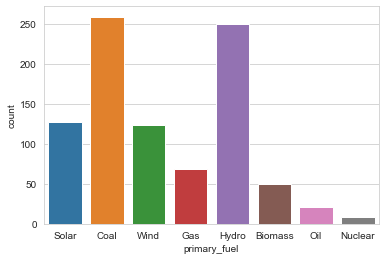

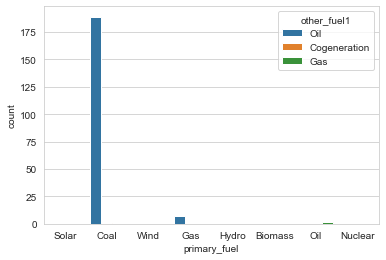

<Figure size 432x216 with 0 Axes>

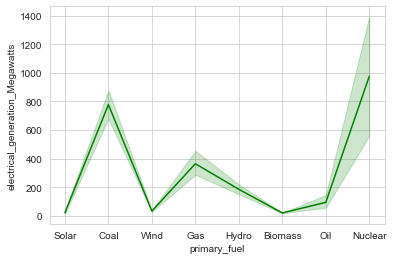

In [90]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)
plt.show()

#countplot with hue label
sns.countplot(x="primary_fuel", hue='other_fuel1',data = df)
plt.figure(figsize=(6,3))
plt.show()

sns.lineplot(x="primary_fuel",y='electrical_generation_Megawatts',data=df, color='green')
plt.show()


**OBSERVATION**
1. Coal and Hydro is the maximum used
2. Oil is the maximum used other than the primary source
3. Maximum power generation is for Coal and oil

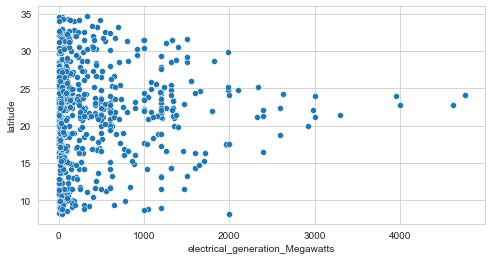

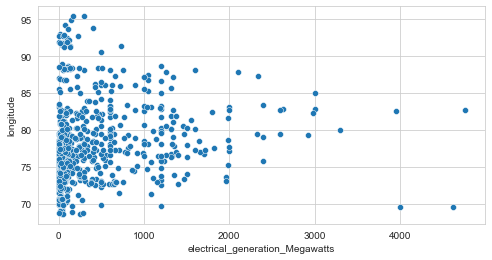

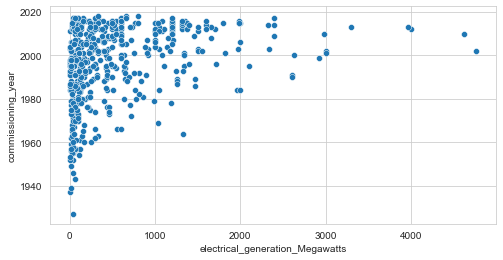

In [91]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='electrical_generation_Megawatts',y='latitude',data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='electrical_generation_Megawatts',y='longitude',data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='electrical_generation_Megawatts',y='commissioning_year',data=df)
plt.show()



**OBSERVATION**
1. Electricity generation peaks beteen 20 and 25 degree latitude and 73-87 degree longitude
2. Nearer the year of creation, maximum electricity generation occurs. Between 2000-2020 has maximum production


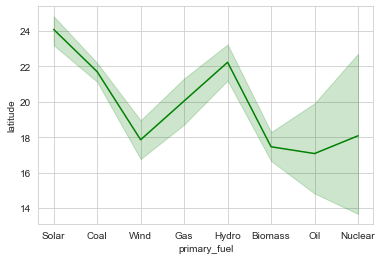

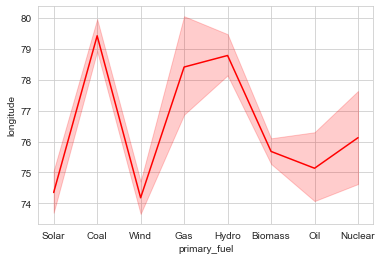

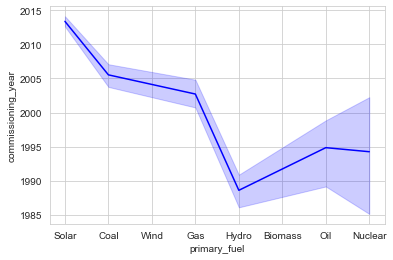

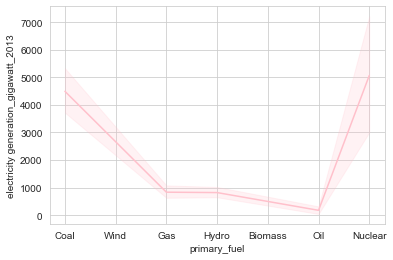

In [92]:
sns.lineplot(x="primary_fuel",y='latitude',data=df, color='green')
plt.show()

sns.lineplot(x="primary_fuel",y='longitude',data=df, color='red')
plt.show()

sns.lineplot(x="primary_fuel",y='commissioning_year',data=df, color='blue')
plt.show()

sns.lineplot(x="primary_fuel",y='electricity generation_gigawatt_2013',data=df, color='pink')
plt.show()

**Observation**
1. Solar power,coal and hydro power generation are seen in tropical areas and the rest in the temperate regions
2. Hydro power generation was predominant in 1990 and solar in 2015
3. Electricity generation in 2013 primary was nuclear and coal

**2.Analysing numerical data with label**

In [93]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['electrical_generation_Megawatts', 'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017'],
      dtype='object')

In [94]:
num=df[{'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017'}]

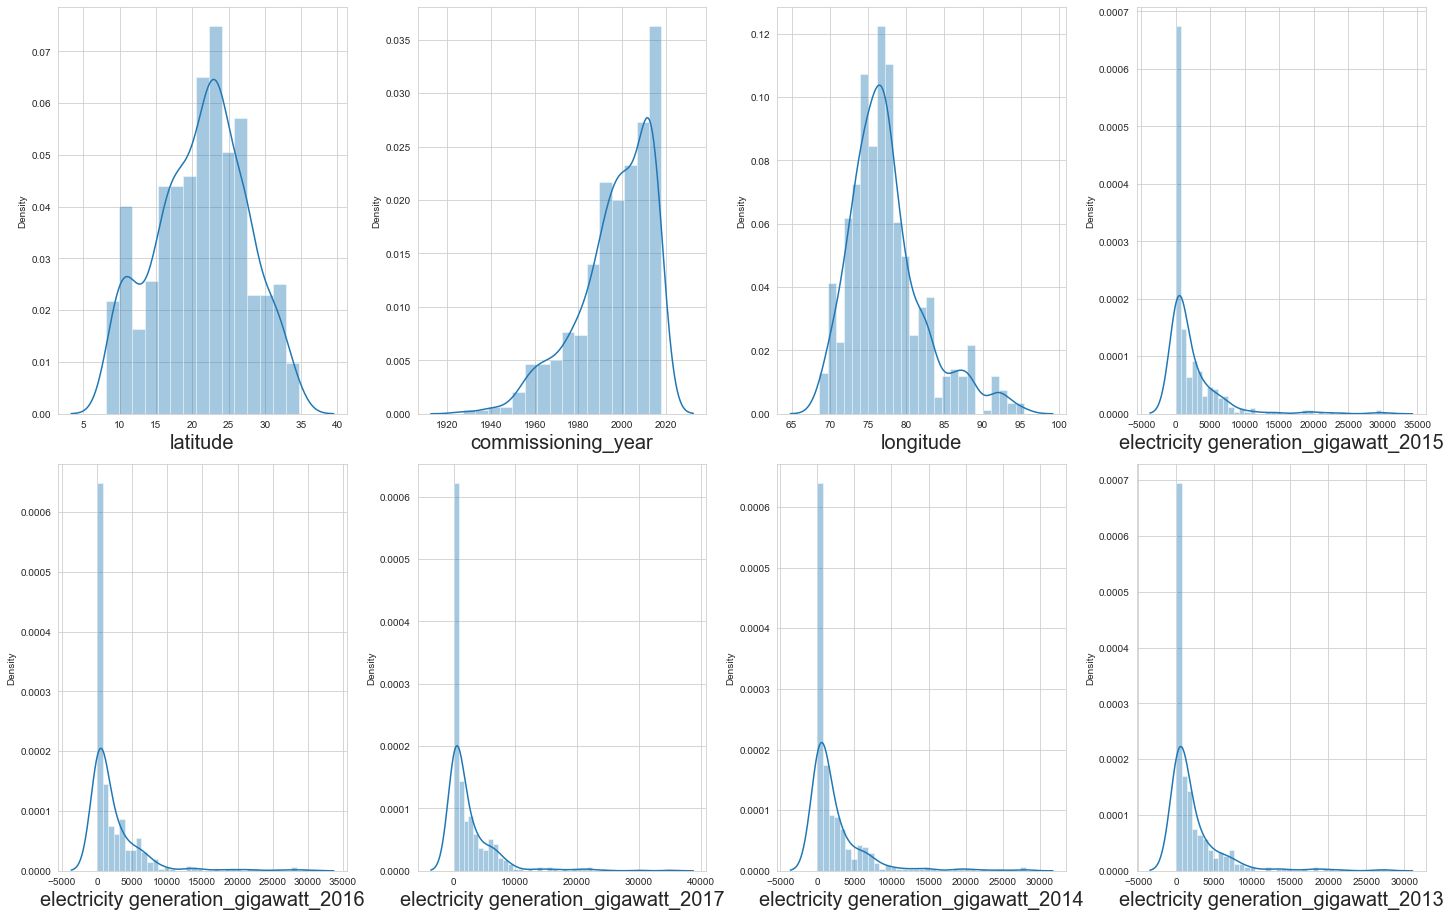

In [95]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()
plt.show()


**Observations:**

Highest value:
1. longitude is 78 and latitude is 22
2. generation_gwh_2017 is 3000,generation_gwh_2014 is 2200,generation_gwh_2013 is 2200,generation_gwh_2015 is 2200, generation_gwh_2016 is 2200

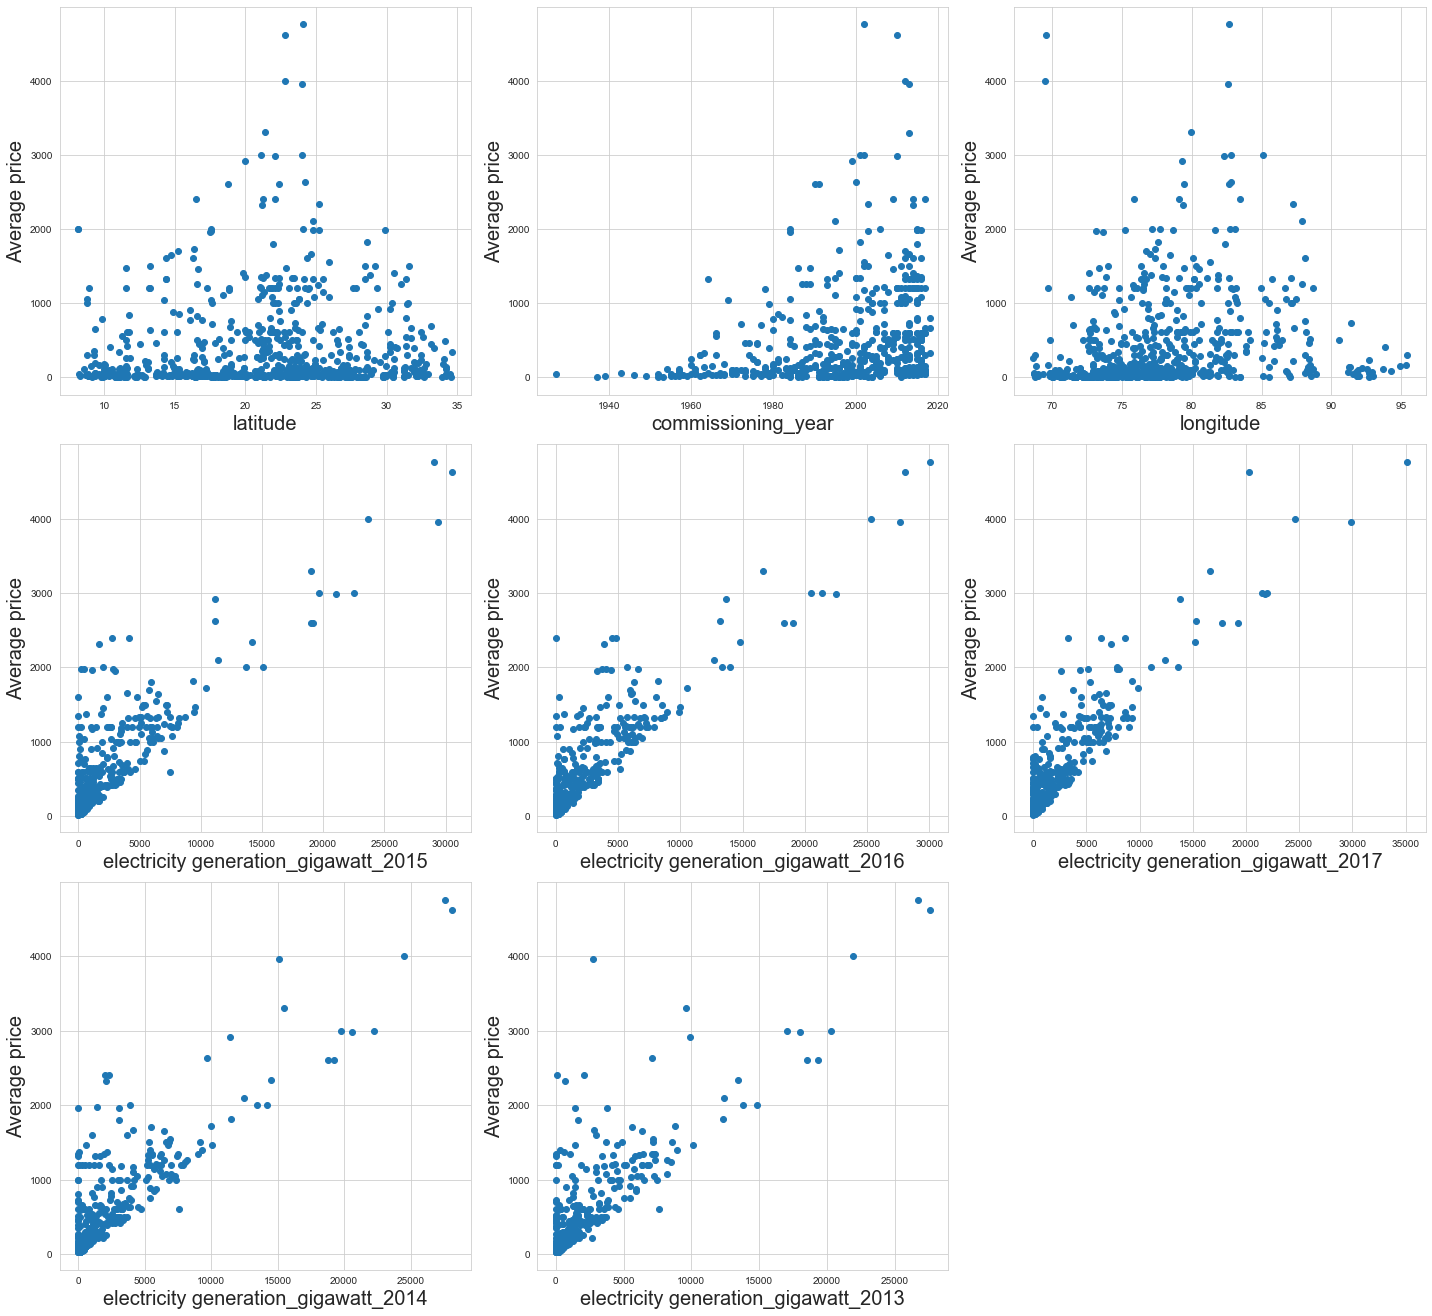

In [96]:
#Analysing the relationship between numerical features and Label

y_table=df['electrical_generation_Megawatts']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATION**
1. Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW
2. Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW
3. The capacity increases as generation_gwh_2017 increases. The 2013,2014,2015 and 2016 is similar to this

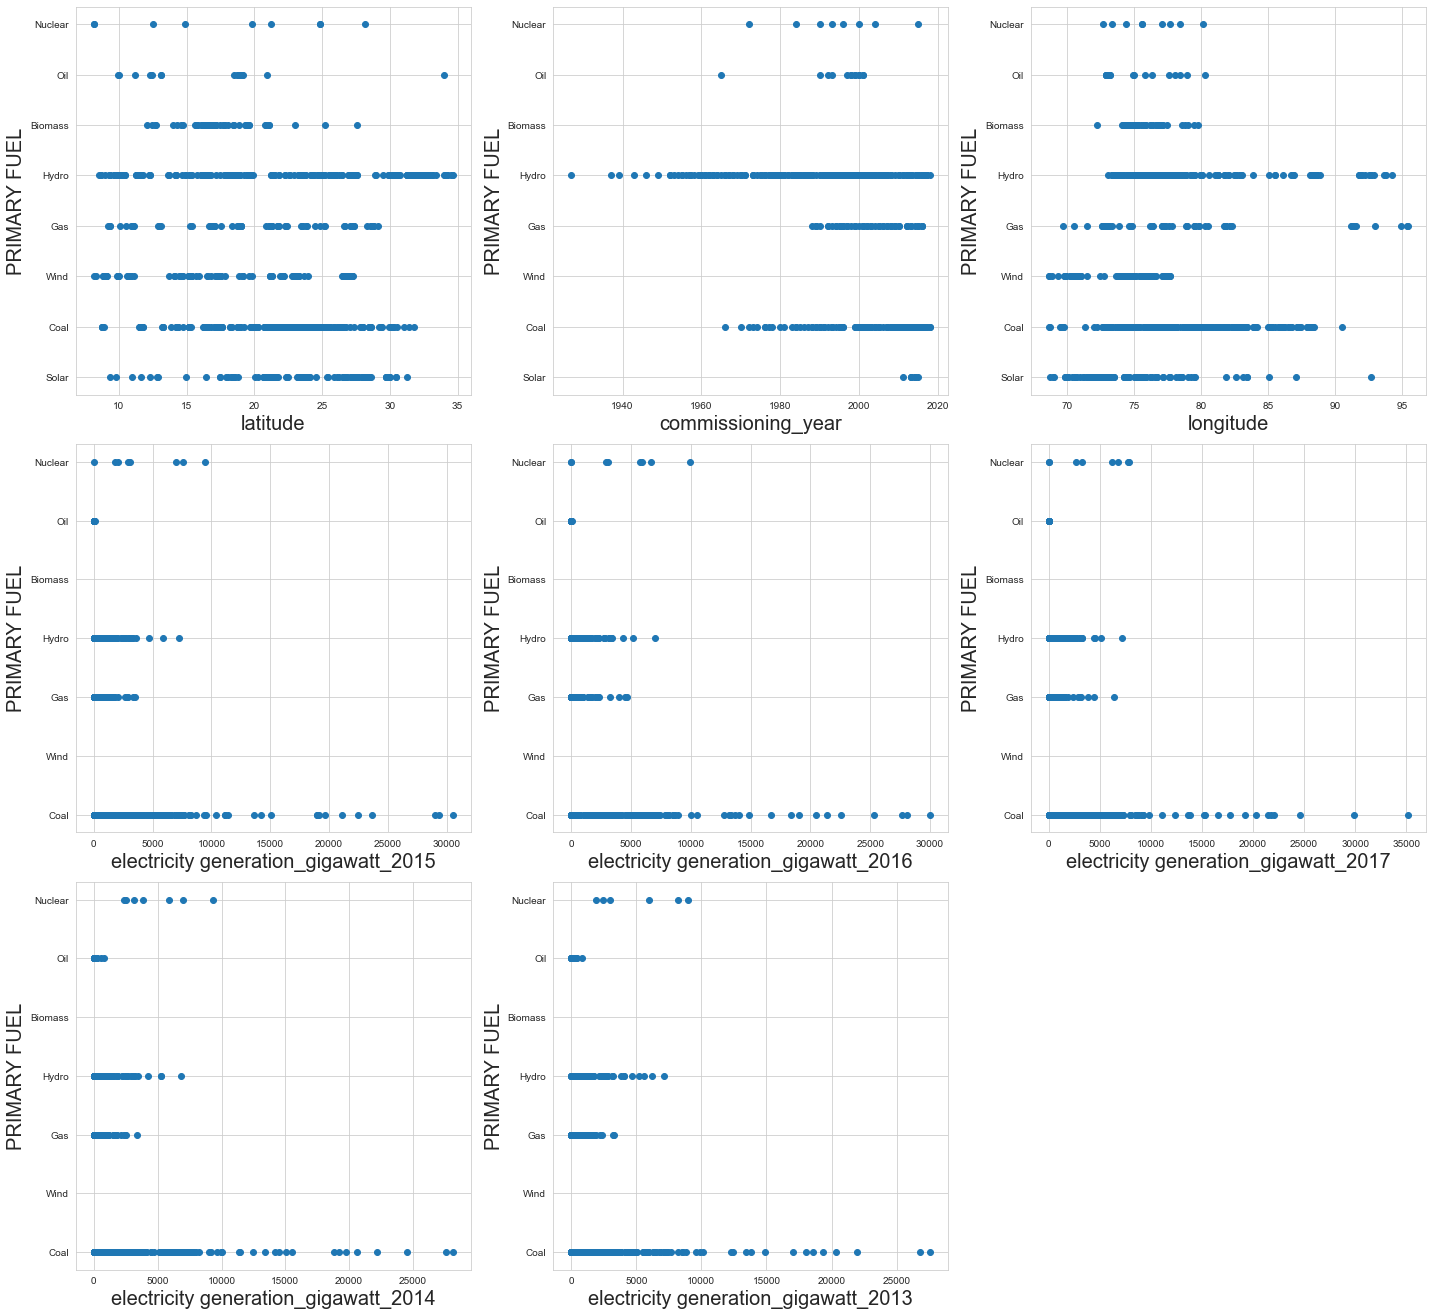

In [97]:

y_table=df['primary_fuel']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRIMARY FUEL',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATIONS:**
1. Maximum electricity generation is seen in 2017,2016,2015,2014 and 2013 is through coal
2. Gas,wind,oil and biomass is more towards temperate regions
3. Hydro power plants were the earliest commissioned and then coal.
4. Power generation between 80-95 degree longitude is not by nuclear,biomass,oil and wind. Even coal and solar is very less there. Hydro is predominant in these longitudes.

# EDA

**1.Null values**

In [98]:
#Checking null values
df.isnull().sum()

electrical_generation_Megawatts           0
latitude                                 46
longitude                                46
primary_fuel                              0
other_fuel1                             709
commissioning_year                      380
owner                                   566
source                                    0
url                                       0
geolocation_source                       19
electricity generation_gigawatt_2013    524
electricity generation_gigawatt_2014    507
electricity generation_gigawatt_2015    483
electricity generation_gigawatt_2016    471
electricity generation_gigawatt_2017    465
dtype: int64

<AxesSubplot:>

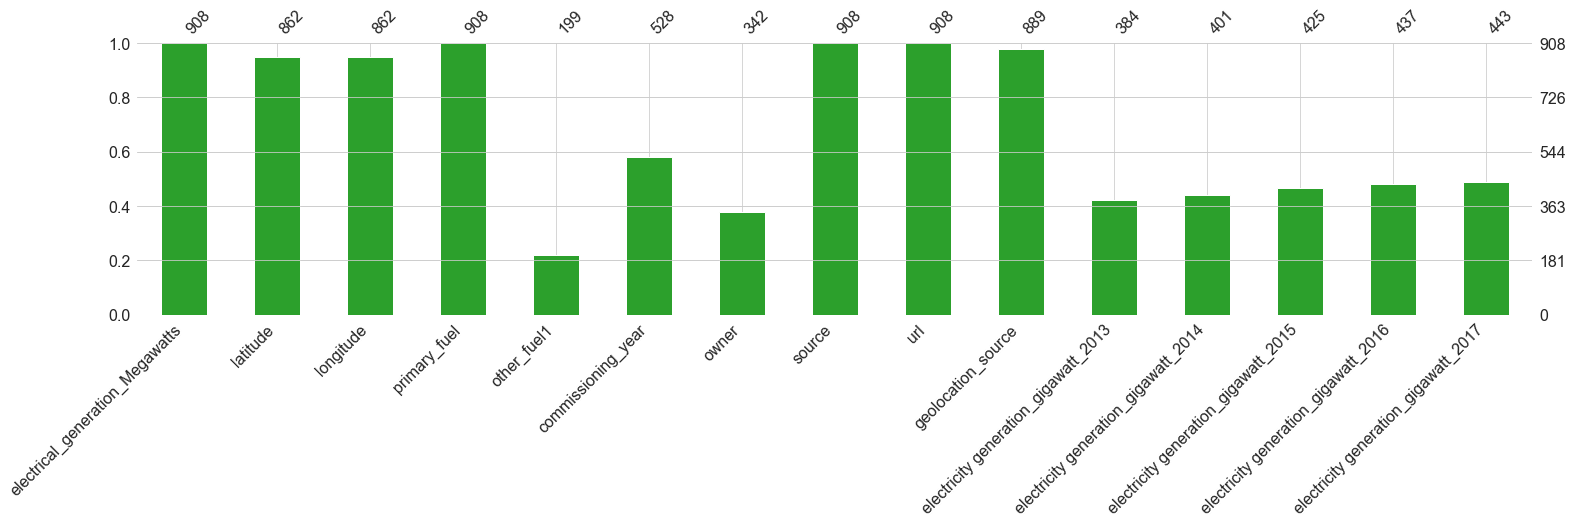

In [99]:
import missingno
missingno.bar(df, figsize = (25,5), color="tab:green")

In [100]:
#calculating percentage of null values
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return missing_value_df

missing_values(df,80)

,column_name,percent_missing
electrical_generation_Megawatts,electrical_generation_Megawatts,0.000000
latitude,latitude,5.066079
longitude,longitude,5.066079
primary_fuel,primary_fuel,0.000000
other_fuel1,other_fuel1,78.083700
commissioning_year,commissioning_year,41.850220
owner,owner,62.334802
source,source,0.000000
url,url,0.000000
geolocation_source,geolocation_source,2.092511


1.Removing columns which have above 70% null values

In [101]:
df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)

2.removing duplicate values


In [102]:
df.drop_duplicates(inplace=True)

3.Mean of columns which have numerical data and have null values

Numerical columns are capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       , 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'

In it null values are there in latitude,longitude,generation_gwh_2013, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, generation_gwh_2017

dealing with these null values by replacing it with mean

In [103]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["electricity generation_gigawatt_2013"].fillna(df["electricity generation_gigawatt_2013"].mean(),inplace=True)
df["electricity generation_gigawatt_2014"].fillna(df["electricity generation_gigawatt_2014"].mean(),inplace=True)
df["electricity generation_gigawatt_2015"].fillna(df["electricity generation_gigawatt_2015"].mean(),inplace=True)
df["electricity generation_gigawatt_2016"].fillna(df["electricity generation_gigawatt_2016"].mean(),inplace=True)
df["electricity generation_gigawatt_2017"].fillna(df["electricity generation_gigawatt_2017"].mean(),inplace=True)

4.Mode of columns with categorical datas

In [104]:
#df["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["owner"].fillna(df["owner"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [105]:
#Checking null values
df.isnull().sum()

electrical_generation_Megawatts         0
latitude                                0
longitude                               0
primary_fuel                            0
commissioning_year                      0
owner                                   0
source                                  0
url                                     0
geolocation_source                      0
electricity generation_gigawatt_2013    0
electricity generation_gigawatt_2014    0
electricity generation_gigawatt_2015    0
electricity generation_gigawatt_2016    0
electricity generation_gigawatt_2017    0
dtype: int64

**2.dealing outliers on numerical data**

In [106]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['electrical_generation_Megawatts', 'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017'],
      dtype='object')

In [107]:
num=df[{'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017'}]

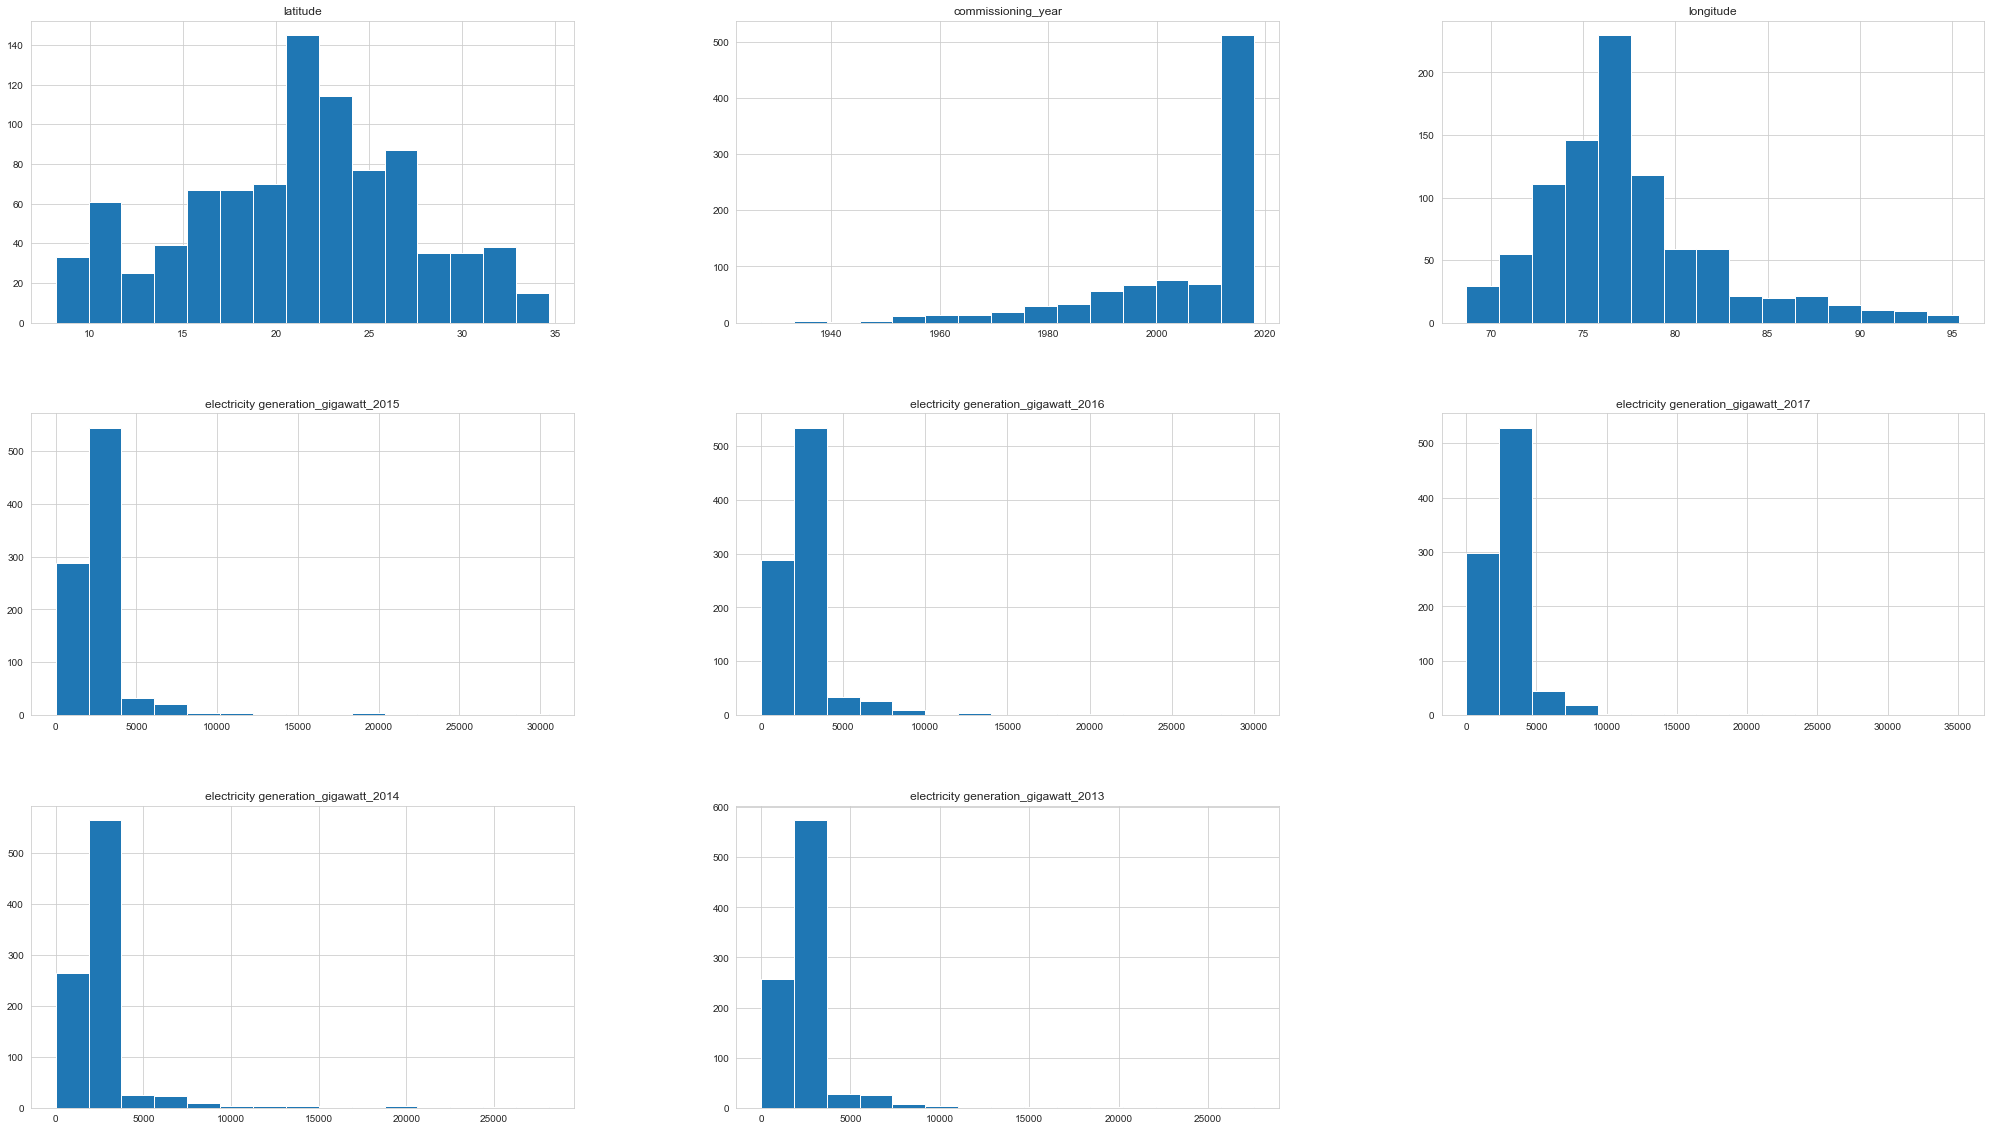

In [108]:
num.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

There is outliers present in  as well as skewness in generation2017,2016,2014,2013 and 2015 which needs to be removed

In [109]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  908
columns after applying zscore:  854


In [110]:
df=df_new

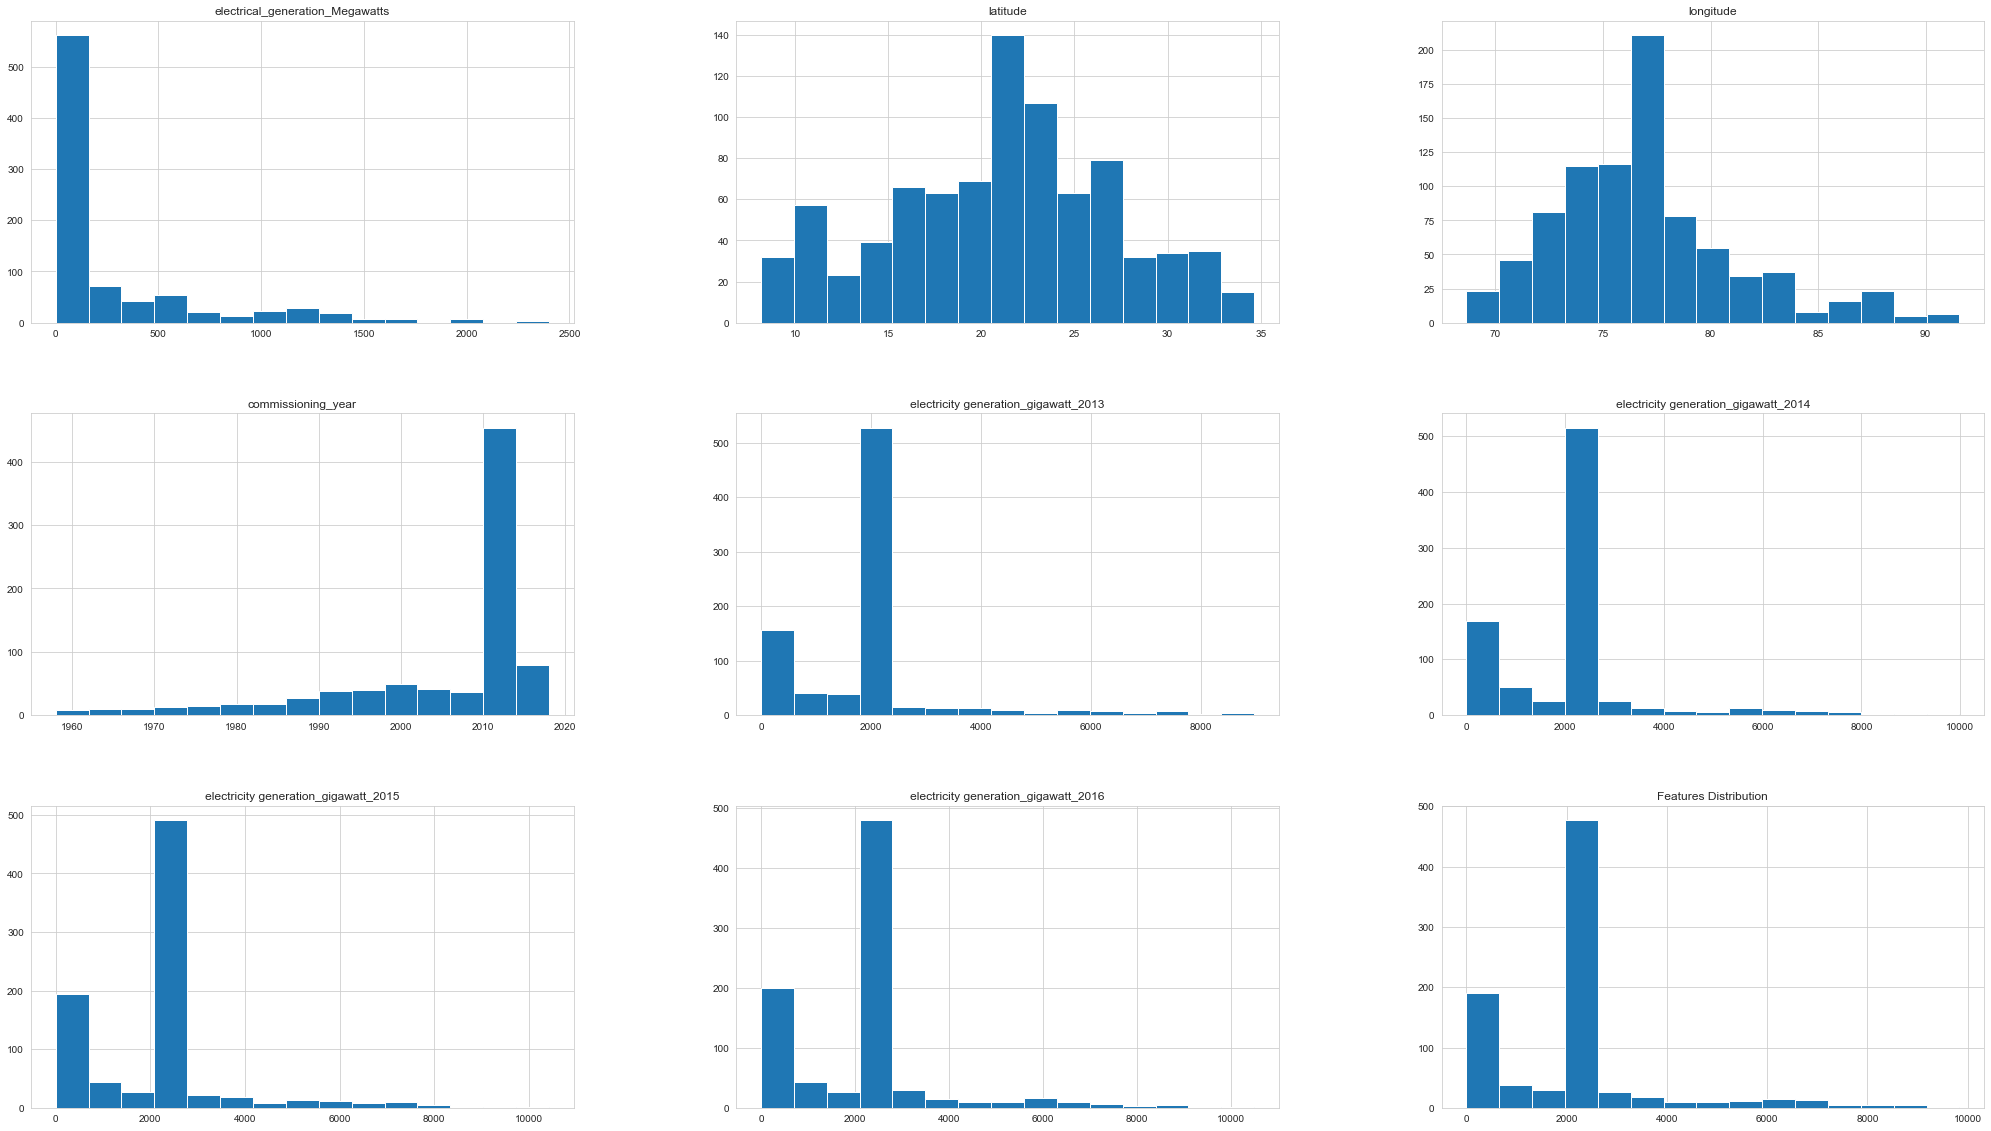

In [111]:
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

skewness is still present hence will remove it

**3.DEALING WITH SKEWNESS**

In [112]:
df.skew()

electrical_generation_Megawatts         2.126770
latitude                               -0.106361
longitude                               0.862421
commissioning_year                     -1.622236
electricity generation_gigawatt_2013    1.545389
electricity generation_gigawatt_2014    1.458480
electricity generation_gigawatt_2015    1.331003
electricity generation_gigawatt_2016    1.341657
electricity generation_gigawatt_2017    1.275889
dtype: float64

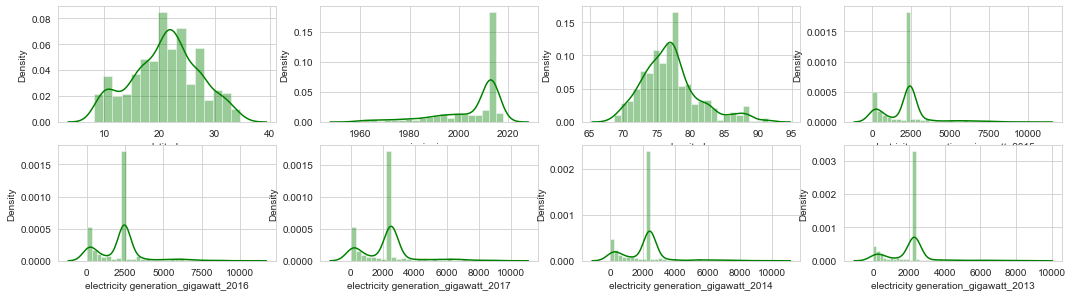

In [113]:
num=df[{'latitude', 'longitude',
       'commissioning_year', 'electricity generation_gigawatt_2013',
       'electricity generation_gigawatt_2014',
       'electricity generation_gigawatt_2015',
       'electricity generation_gigawatt_2016',
       'electricity generation_gigawatt_2017'}]

plt.figure(figsize=(18,20))
for i in enumerate(num):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [114]:
#removing skewness using log1p
for col in num:
    if num.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

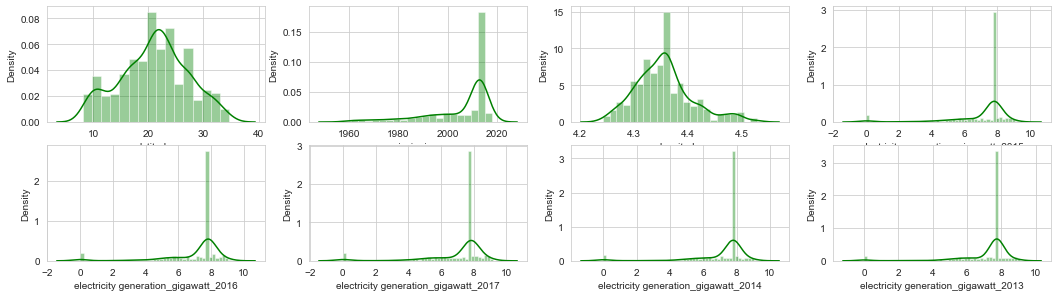

In [115]:
plt.figure(figsize=(18,20))
for i in enumerate(num):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

# Encoding

In [116]:
df.select_dtypes(exclude=["number"]).columns

Index(['primary_fuel', 'owner', 'source', 'url', 'geolocation_source'], dtype='object')

In [117]:
#label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['owner']= label_encoder.fit_transform(df['owner'])
df['source']= label_encoder.fit_transform(df['source'])
df['url']= label_encoder.fit_transform(df['url'])
df['geolocation_source']= label_encoder.fit_transform(df['geolocation_source'])
df['primary_fuel']= label_encoder.fit_transform(df['primary_fuel'])

-----------------------------**PREDICTION FOR PRIMARY FUEL**-------------------------------------

In [41]:
x=df.drop(columns=["primary_fuel",'electrical_generation_Megawatts'])
y=df['primary_fuel']

<AxesSubplot:>

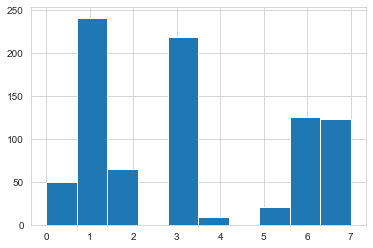

In [42]:
y.hist()

In [43]:
m=df.drop(columns=['electrical_generation_Megawatts'])

**1.Feature selection**

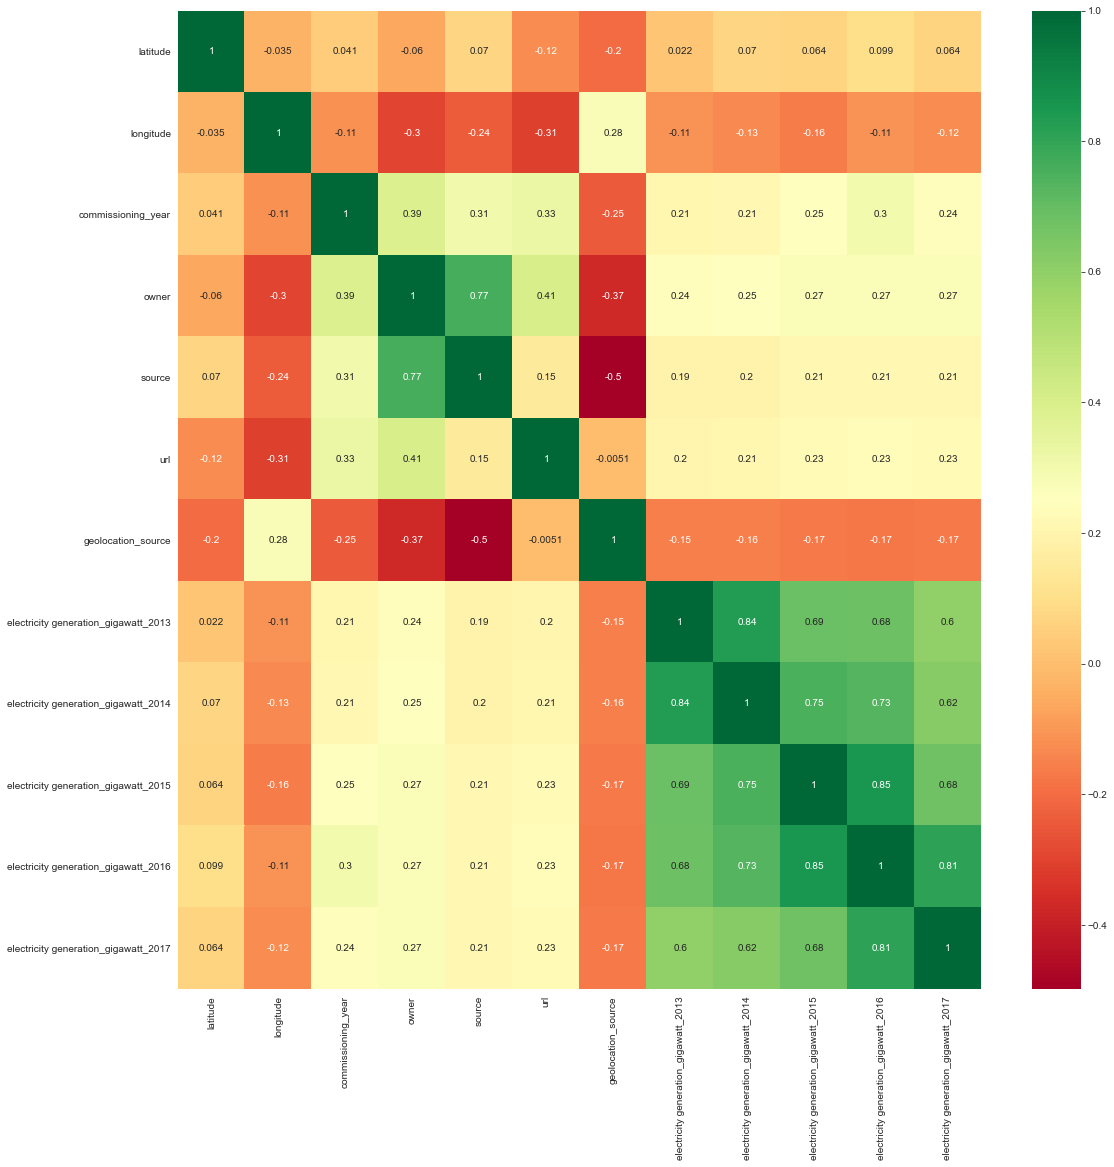

In [44]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(x.corr(), annot = True, cmap = "RdYlGn")
plt.show()

**Multicollinearity**
1. It exists in the dataset between electricity generation_gigawatt_2013 and electricity generation_gigawatt_2014
2. It exists in the dataset between electricity generation_gigawatt_2015 and electricity generation_gigawatt_2016
3. It exists between owner and source

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 907
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   electrical_generation_Megawatts       854 non-null    float64
 1   latitude                              854 non-null    float64
 2   longitude                             854 non-null    float64
 3   primary_fuel                          854 non-null    int32  
 4   commissioning_year                    854 non-null    float64
 5   owner                                 854 non-null    int32  
 6   source                                854 non-null    int32  
 7   url                                   854 non-null    int32  
 8   geolocation_source                    854 non-null    int32  
 9   electricity generation_gigawatt_2013  854 non-null    float64
 10  electricity generation_gigawatt_2014  854 non-null    float64
 11  electricity generat

In [46]:
#vif
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)


vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.108054,latitude
1,1.245534,longitude
2,1.319057,commissioning_year
3,3.247286,owner
4,2.954048,source
5,1.516081,url
6,1.490105,geolocation_source
7,3.491175,electricity generation_gigawatt_2013
8,4.234474,electricity generation_gigawatt_2014
9,4.324074,electricity generation_gigawatt_2015


In [47]:
#standardisation
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)


**2.Finding best random state**

In [48]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8177570093457944 on Random State 73


**3. Train test split**

In [49]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=73)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [50]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(683, 12)
(683,)
(85, 12)
(85,)
(86, 12)
(86,)


(None, None)

**4.Modelling**

In [51]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))
models.append(('LogisticRegression', LR))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.627906976744186


Cross_Val_Score =  0.6027777777777779


[[ 1  1  0  0  0  0  0]
 [ 3 15  0  5  0  1  1]
 [ 0  1  0  2  1  0  1]
 [ 0  3  2 17  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 3  5  0  0  0  7  1]
 [ 0  0  0  0  0  0 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.8488372093023255


Cross_Val_Score =  0.6972222222222222


[[ 2  0  0  0  0  0  0]
 [ 2 17  1  5  0  0  0]
 [ 0  0  4  1  0  0  0]
 [ 0  1  1 20  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** XGBClassifier *************************

LogisticRegression()


Accuracy_score =  0.5465116279069767


Cross_Val_Score =  0.5291666666666666


[[ 0  0  0  0  0  2  0]
 [ 0  4  0 18  0  2  1]
 [ 0  0  0  4  0  0  1]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 3  4  0  1  0  7  1]
 [ 0  0  0  0  0  0 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





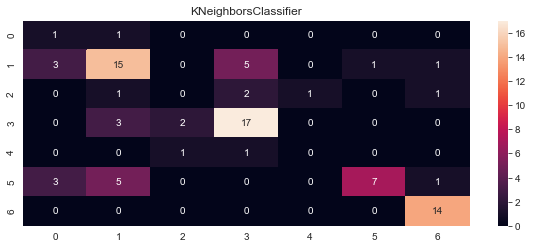

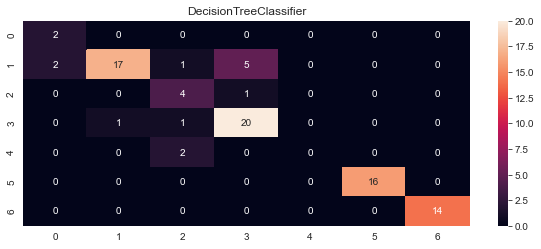

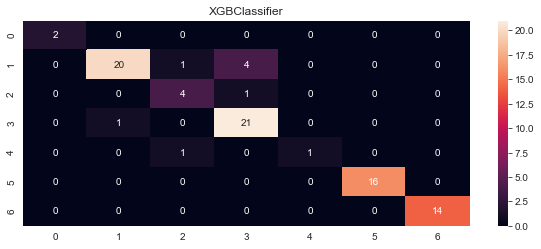

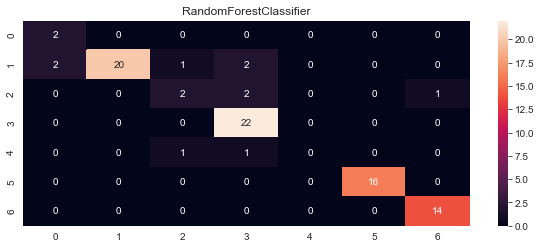

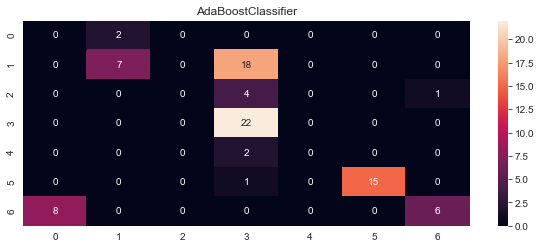

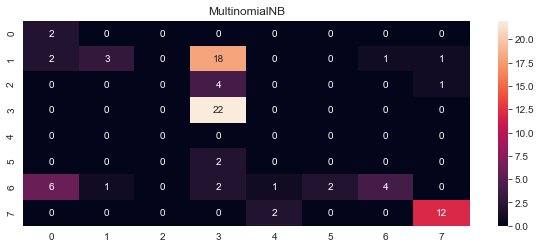

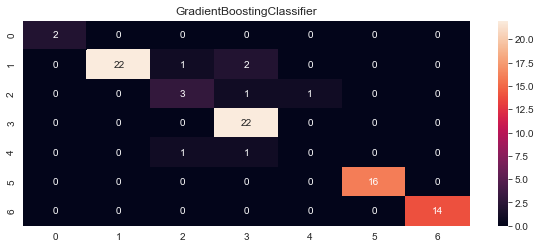

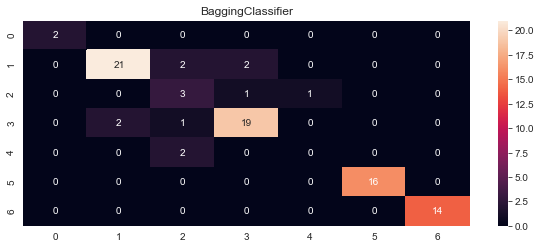

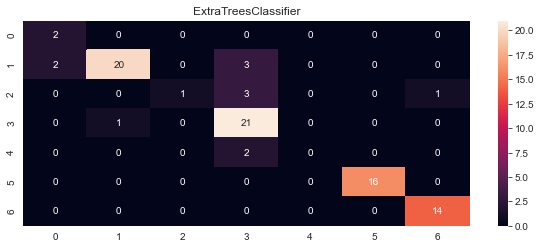

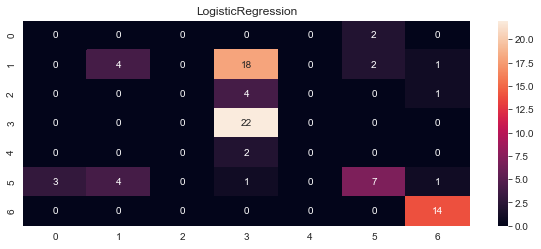

In [52]:
Model= []
score= []
cvs=[]
rocscore=[]

difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(X_train,Y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    
    AS=accuracy_score(Y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    
    sc= cross_val_score(model, X_valid,Y_valid, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    
    cm=confusion_matrix(Y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [53]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'difference between a and c':difference})
result

,Model,Accuracy_score,Cross_val_score,difference between a and c
0,KNeighborsClassifier,62.790698,60.277778,0.025129
1,DecisionTreeClassifier,84.883721,69.722222,0.151615
2,XGBClassifier,90.697674,77.361111,0.133366
3,RandomForestClassifier,88.372093,80.972222,0.073999
4,AdaBoostClassifier,58.139535,62.222222,-0.040827
5,MultinomialNB,50.000000,45.000000,0.050000
6,GradientBoostingClassifier,91.860465,77.361111,0.144994
7,BaggingClassifier,87.209302,76.250000,0.109593
8,ExtraTreesClassifier,86.046512,83.472222,0.025743
9,LogisticRegression,54.651163,52.916667,0.017345


**Best model chosen**

Gradient boosting classifier is chosen as it has the highest accuracy and least difference with cross validation score

**Hyperparameter Tuning**

In [54]:
#GradientBoostingClassifier
paramters={'n_estimators':[15, 20,25,30],
           'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
           'max_features':[1,2,3],
           'max_depth':[1,2,3],
           'random_state':[0,1,2]
           }

In [56]:
GCV=GridSearchCV(GradientBoostingClassifier(),paramters,cv=5)
GCV.fit(X_train,Y_train)
GCV.best_params_

{'learning_rate': 0.25,
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 30,
 'random_state': 1}

In [57]:
final_model_classifier=GradientBoostingClassifier(learning_rate= 0.25,max_depth= 3,max_features= 3,n_estimators=30,random_state= 1)


In [59]:
#training
final_model_classifier.fit(X_train,Y_train)

#predicting
pred=final_model_classifier.predict(X_test)

#finding scores
Accuracy_Score_final=(accuracy_score(Y_test,pred))*100
cross_val_score_final= (cross_val_score(final_model_classifier, X_test,Y_test, cv=10, scoring='accuracy').mean())*100

In [60]:
#printing scores
print("Accuracy score of final model:",Accuracy_Score_final)
print("Cross validation score of final model:",cross_val_score_final)

Accuracy score of final model: 86.04651162790698
Cross validation score of final model: 76.11111111111111


**Saving Model**

In [63]:
# save the model to disk
model_file_path='FinalModel_1.pkl'
pickle.dump(final_model_classifier, open(model_file_path, 'wb'))

-------------------------------------------------------------------------------------MODEL BUILT----------------------------------------------------------------

---------------**PREDICTION FOR ELECTRICITY POWER GENERATED**---------------------------------------

<AxesSubplot:>

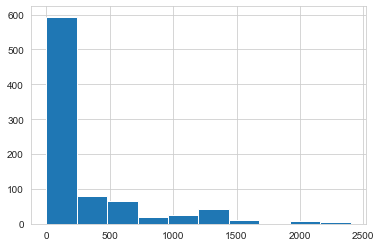

In [118]:
df['electrical_generation_Megawatts'].hist()

In [119]:
x=df.drop(columns=["primary_fuel",'electrical_generation_Megawatts'])
y=df['electrical_generation_Megawatts']

In [120]:
#standardisation
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 907
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              854 non-null    float64
 1   longitude                             854 non-null    float64
 2   commissioning_year                    854 non-null    float64
 3   owner                                 854 non-null    int32  
 4   source                                854 non-null    int32  
 5   url                                   854 non-null    int32  
 6   geolocation_source                    854 non-null    int32  
 7   electricity generation_gigawatt_2013  854 non-null    float64
 8   electricity generation_gigawatt_2014  854 non-null    float64
 9   electricity generation_gigawatt_2015  854 non-null    float64
 10  electricity generation_gigawatt_2016  854 non-null    float64
 11  electricity generat

In [ ]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

In [ ]:
#splitting the data

from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=199)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)


In [ ]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

In [ ]:
#Testing various models
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
XGBR=XGBRegressor()
LGBR=LGBMRegressor()


models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('XGBRegressor',XGBR))
models.append(('LGBMRegressor',LGBR))

Model= []
score= []
cvs=[]
difference=[]
RMSE=[]

for name,model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
    # Training the model
    model.fit(X_train, Y_train) #computer learing
    
    print(model)
    
     # Predicting Y_test
    pred = model.predict(X_test)  #testing
    
    print('\n') 
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    score.append(r2)
    print('\n')
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,X_valid,Y_valid, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    
     # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
    #plots created
    sns.regplot(Y_test,pred)
    plt.title(name)
    plt.show()
    


In [ ]:
result = pd.DataFrame({'Model': Model, 'r2score': score,'Cross_val_score': cvs,'RMSE score':RMSE,'Difference between cv score and cross_val score':difference})
result

**Selection of best model**


In [ ]:
#HYPER-PARAMETER TUNING

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params= {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [100,200,500],
              'eta' : [0.001, 0.01, 0.1]
             }

In [ ]:
GSCV = GridSearchCV(XGBRegressor(tree_method='gpu_hist'), param, cv=5)

start_time = timer(None)
GSCV.fit(X_train,Y_train)
timer(start_time)

GSCV.best_params_

In [ ]:
Final_Model = XGBRegressor(booster='gbtree', eta=0.1, importance_type='gain', n_estimators=200,tree_method='gpu_hist')
regressor = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

In [ ]:
#Saving the best Regression ML model
import joblib as joblib

filename = "FinalModel_Bigdatamart.pkl"
joblib.dump(Final_Model, filename)

-----------------------------------------------------Model development complete------------------------------------------------------